In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Zadanie1: Czy jest możliwe żeby dwie pierwsze komponenty objaśniały 100% wariancji danych 50D? Jeśli nie - udowodnij, jeśli tak - podaj przykład.

Tak, ale są to nienaturalne, rzadkie przypadki- wydaje mi się że może dojść do tego tylko wtedy, gdy pierwsze dwie komponenty diametralnie różnią się pod względem ilości próbek od reszty komponentów - jest ich tak dużo że dominują one i "zasłaniają" resztę? (Albo kiedy z jakiegoś powodu reszta komponentów nie jest istotna statystycznie? Ale to chyba wychodzi na to samo)
Dzieje się tak wtedy kiedy dane nie zostały znormalizowane?


Zadanie2: Rozważ dane iris. Dokonaj standaryzacji a następnie przeprowadź algorytm PCA. Która z cech wydaje się najistoniejsza? Ile komponentów wystarczająco dobrze opisuje te dane? Skomentuj otrzymane wyniki.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data.shape)

(150, 4)


In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train[0:2])
print(X_train_scaled[0:2])

[[6.7 3.1 5.6 2.4]
 [5.5 4.2 1.4 0.2]]
[[ 1.14790549  0.11648238  1.1162961   1.594449  ]
 [-0.40157324  2.62884754 -1.36305008 -1.31175465]]


In [6]:
pca_iris = PCA(n_components=4).fit(X)
pca_iris.explained_variance_ratio_


array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [7]:
print("Wariancja na poziomie:", 0.92461872 + 0.05306648)

Wariancja na poziomie: 0.9776852


In [8]:
#Po standaryzacji:
X_scaled = scaler.transform(X)
pca_iris = PCA(n_components=4).fit(X_scaled)
pca_iris.explained_variance_ratio_

array([0.7390093 , 0.21841767, 0.03735244, 0.00522059])

In [9]:
#Z tego wynika, że pierwszy i drugi komponent są najistotniejsze i moglibyśmy zredukować wymiar do 2D -> 
print("Wariancja na poziomie:", 0.73748495+0.2200713)

Wariancja na poziomie: 0.95755625


In [10]:
# eigen_vecs
cov_mat = np.cov(X_train_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
print('Eigenvalues \n%s'% eigen_vals)


Eigenvalues 
[3.01474498 0.87333678 0.13280766 0.01951462]


In [11]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
var_exp_cum = np.cumsum(var_exp) # stepping-sum

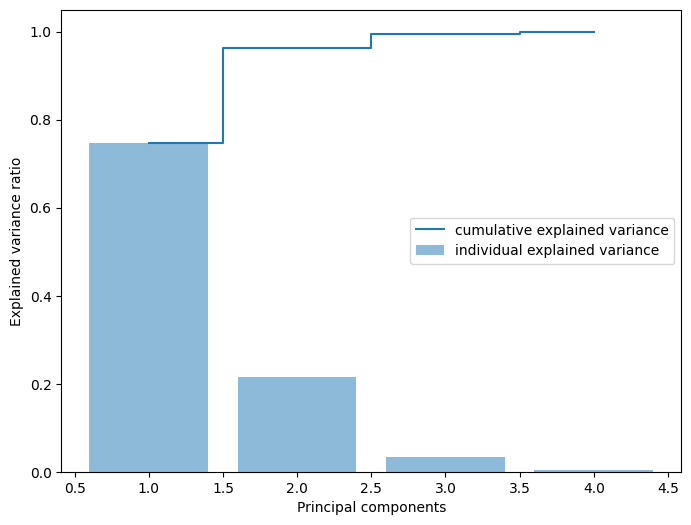

In [12]:
plt.figure(figsize=(8,6))
plt.bar( range(1, 5), var_exp,     alpha=0.5,   align='center', label='individual explained variance')
plt.step(range(1, 5), var_exp_cum, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [13]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs[0:1]

[(3.0147449765828345,
  array([ 0.52032727, -0.29616204,  0.5742214 ,  0.5584061 ]))]

In [14]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))

X_train_pca = X_train_scaled.dot(w)

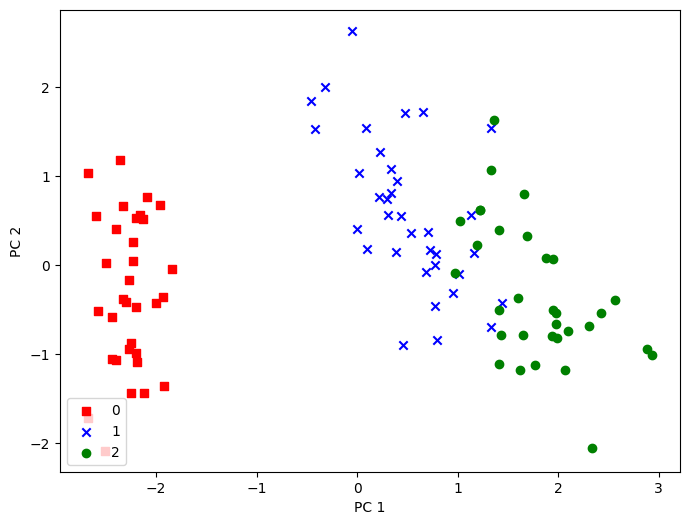

In [15]:
colors  = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
plt.figure(figsize=(8,6))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Zarówno z obliczeń metodą pca_iris.explained_variance_ratio_ jak i obliczenia Eigenvalues wynika, pierwszy i drugi komponent są najistotniejsze i wymiar może być zredukowany do 2D.

In [16]:
#Chyba nie trzeba było tutaj dzielić danych na treningowe i testowe prawda? Testowe nie zostały nigdzie wykorzystane

Zadanie3: Rozważ jeszcze raz dane dotyczące twarzy różnych osób (fetch_lw_people) rozważane podczas ćwiczenia z SVM. Zastosuj podobnie jak wtedy PCA ze 150 komponentnami. Jaki procent wariancji opisują te komponenty? Narysuj kilka początkowych komponentów (wektory własne); oczywiście podobnie jak obrazy są to wektory 64 x 47  wymiarowe - przed narysowaniem należy jeszcze zastosować metodę reshape. Zastanów się nad ich interpretacją.

In [91]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)

print(faces.images.shape)

(1348, 62, 47)


In [92]:
pca = PCA(n_components = 150, whiten = True, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=42)

In [93]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train[0:2])
print(X_train_scaled[0:2])

[[0.00130719 0.00130719 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.1006536  0.10849673 0.10457516]]
[[-0.45414507 -0.50541323 -0.5591946  ... -0.73533386 -0.6773991
  -0.595214  ]
 [-0.4608081  -0.51157326 -0.5591946  ... -0.16163772 -0.04245965
   0.03773888]]


In [95]:
pca_transform = pca.fit_transform(faces.data)
pca.explained_variance_ratio_

array([0.27407184, 0.05782887, 0.05477659, 0.04588321, 0.03496135,
       0.03022066, 0.02686093, 0.02055833, 0.01932969, 0.01815584,
       0.0156171 , 0.01478354, 0.0133483 , 0.01303912, 0.0116671 ,
       0.01045016, 0.00906042, 0.00855974, 0.00834328, 0.00784912,
       0.00749907, 0.00731146, 0.0068779 , 0.00624698, 0.00601433,
       0.00550359, 0.00535702, 0.00511876, 0.00475662, 0.00450022,
       0.00433356, 0.00418479, 0.00398599, 0.00390402, 0.00367198,
       0.0036224 , 0.00338347, 0.00328482, 0.00318456, 0.00308775,
       0.00303602, 0.00299054, 0.0028566 , 0.00278995, 0.00273489,
       0.00261456, 0.00251659, 0.00250886, 0.00235909, 0.00229056,
       0.00224918, 0.00222477, 0.00211798, 0.00209819, 0.00206267,
       0.00201085, 0.00196698, 0.00193892, 0.00191094, 0.00184025,
       0.00180581, 0.00179025, 0.00169296, 0.0016695 , 0.00164452,
       0.00163268, 0.00159169, 0.00154397, 0.00151092, 0.00147243,
       0.00145264, 0.00144019, 0.00140885, 0.00140093, 0.00137

In [99]:
arr = pca.explained_variance_ratio_
ans = sum(arr)
print("Komponenty opisują", round(ans*100, 2), "% wariancji")

Komponenty opisują 92.17 % wariancji


In [110]:
x1 = pca.components_[0]
print(x1.reshape(62,47)) #na 64 x 47 były za małe
np1 = np.asarray(x1)


[[0.00925764 0.01110025 0.01344573 ... 0.01311486 0.01250124 0.01142558]
 [0.01123843 0.01355797 0.01596539 ... 0.01602963 0.01516834 0.01323583]
 [0.01258811 0.01537982 0.01808662 ... 0.01993522 0.018894   0.01623192]
 ...
 [0.00613077 0.00638644 0.00622934 ... 0.00565111 0.005779   0.00552674]
 [0.00502767 0.00495    0.00504484 ... 0.00486887 0.0050377  0.0049749 ]
 [0.00383444 0.00380282 0.00373284 ... 0.0037694  0.00396663 0.00405892]]


In [111]:
plt.matshow(np1, cmap='Greys')
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

Zadanie4: Zauważ, że wykresy te różnią się zakresem wartości - czy to zrozumiałe?

Wyjściowy sygnał mógł mieć współczynniki których nie znaliśmy, nie możemy ich odzyskać, bo później one są przemnażane przez inne współczynniki i nie wiemy czy efekt jaki uzyskujemy po zsumowaniu ich jest wyłącznie efektem współczynników które daliśmy przy sumowaniu sygnałów, czy też efektem jakiś współczynników które były na początku
